# Sesión 3

CONSAR

Alan Badillo Salas

Viernes 10, octubre 2025.

In [2]:
import pandas

ventas = pandas.read_csv("ventas.csv", encoding="latin-1")

ventas.head()

,fecha,Año,Mes,Cadena Comercial,Categoría,Venta en Piezas,Venta en Pesos,Contribución,Margen
0,01/01/2022,2022,Jan,CADENA 2,SISTEMA RESPIRATORIO,161665,12601618,1884244,14.95%
1,01/12/2022,2022,Dec,CADENA 2,SISTEMA RESPIRATORIO,148352,11917476,1684625,14.14%
2,01/05/2022,2022,May,CADENA 2,SISTEMA DIGESTIVO,207830,7931920,1183168,14.92%
3,01/11/2022,2022,Nov,CADENA 2,SISTEMA RESPIRATORIO,97579,7712420,1147036,14.87%
4,01/01/2022,2022,Jan,CADENA 2,SISTEMA NERVIOSO,64885,7274868,939886,12.92%


In [3]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   fecha             1238 non-null   object
 1   Año               1238 non-null   int64 
 2   Mes               1238 non-null   object
 3   Cadena Comercial  1238 non-null   object
 4   Categoría         1238 non-null   object
 5   Venta en Piezas   1238 non-null   int64 
 6   Venta en Pesos    1238 non-null   int64 
 7   Contribución      1238 non-null   int64 
 8   Margen            1238 non-null   object
dtypes: int64(4), object(5)
memory usage: 87.2+ KB


In [ ]:
ventas["Venta en Piezas"]

0       161665
1       148352
2       207830
3        97579
4        64885
         ...  
1233        11
1234        11
1235         2
1236         2
1237         1
Name: Venta en Piezas, Length: 1238, dtype: int64

In [16]:
piezas = ventas.iloc[:, 5] # .iloc[i:j, ck]
pesos = ventas.iloc[:, 6]

<Axes: ylabel='Density'>

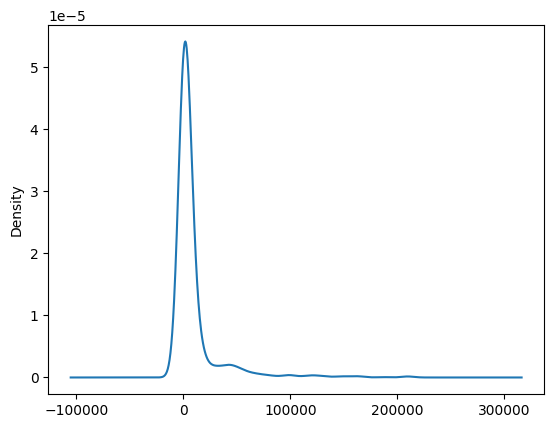

In [17]:
piezas.plot.density()

In [18]:
piezas.describe()

count      1238.000000
mean       9318.383683
std       23971.635047
min           1.000000
25%         221.000000
50%        1817.500000
75%        5587.000000
max      210725.000000
Name: Venta en Piezas, dtype: float64

## Intervalo de Probabilidad

In [23]:
print(f"La media de ventas es de {piezas.mean():.1f} piezas")

La media de ventas es de 9318.4 piezas


In [22]:
print(f"Lo estándar es vender hasta {piezas.mean() + piezas.std():.1f} piezas en 68% de las ventas")

Lo estándar es vender hasta 33290.0 piezas en 68% de las ventas


In [24]:
print(f"Lo estándar es vender hasta {piezas.mean() + 2 * piezas.std():.1f} piezas en 95% de las ventas")

Lo estándar es vender hasta 57261.7 piezas en 95% de las ventas


## Intervalo de Confianza

In [ ]:
! python -m pip install scipy

In [35]:
import scipy.stats as stats

a = 0.05 # 5% (2.5%)

Za2 = stats.distributions.norm.ppf(1 - a / 2)

print(f"Valor crítico al 95% de confianza {Za2:.2f}")

Valor crítico al 95% de confianza 1.96


In [38]:
low = piezas.mean() - Za2 * piezas.std() / (piezas.count()) ** 0.5
high = piezas.mean() + Za2 * piezas.std() / (piezas.count()) ** 0.5
print(f"IC 95%: ({low:.2f}, {high:.2f})")

IC 95%: (7983.06, 10653.70)


## Correlación

In [39]:
piezas = ventas.iloc[:, 5]
pesos = ventas.iloc[:, 6]

<Axes: xlabel='Venta en Piezas', ylabel='Venta en Pesos'>

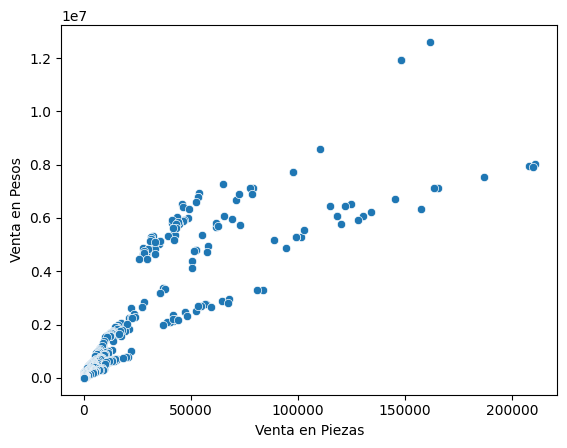

In [40]:
import seaborn

seaborn.scatterplot(x=piezas, y=pesos)

![f301](f301.png)

In [41]:
piezas.corr(pesos)

np.float64(0.887177888401456)

In [42]:
pesos.corr(piezas)

np.float64(0.8871778884014558)

* +1.0 - Fuerte positiva
* +0.5 - Débil positiva
*  0.0 - Nula
* -0.5 - Débil inversa
* -1.0 - Fuerte inversa

<Axes: xlabel='Venta en Piezas', ylabel='Venta en Pesos'>

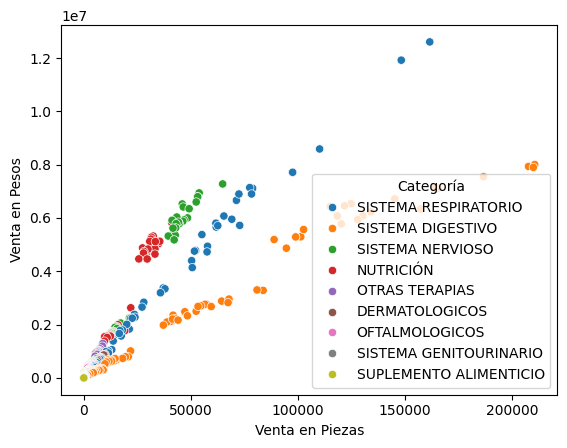

In [43]:
categorias = ventas.iloc[:, 4]

seaborn.scatterplot(x=piezas, y=pesos, hue=categorias)

> Filtro de datos

Un filtro es una aplicación lógica sobre una columna o serie de datos, por ejemplo, en la columna `#4` (quinta columna de categoría), la cual es sometida a una prueba lógica que determnina si los valores de la columna o serie son iguales al valor `"SISTEMA RESPIRATORIO"`.

Esta prueba lógica dará como resultado una serie con valores verdaderos (`True`) y falsos (`False`) que podrá ser aplicada como un filtro para mantener las ventas solo cuando la categoría es **sistema respiratorio** por ejemplo.

In [45]:
filtro = ventas.iloc[:, 4] == "SISTEMA RESPIRATORIO" # Máscara | Filtro

ventas_SR = ventas[filtro]

piezas_SR = ventas_SR.iloc[:, 5]
pesos_SR = ventas_SR.iloc[:, 6]

<Axes: xlabel='Venta en Piezas', ylabel='Venta en Pesos'>

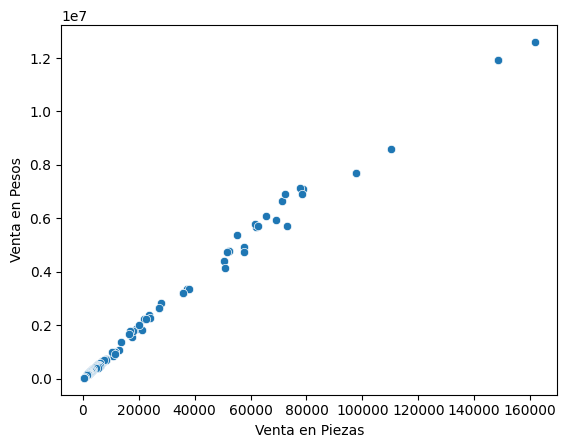

In [46]:
seaborn.scatterplot(x=piezas_SR, y=pesos_SR)

In [47]:
piezas_SR.corr(pesos_SR)

np.float64(0.9959952789224693)

<Axes: xlabel='Venta en Piezas', ylabel='Venta en Pesos'>

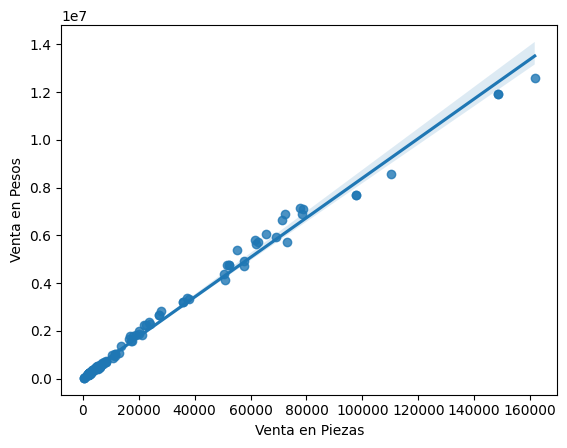

In [48]:
seaborn.regplot(x=piezas_SR, y=pesos_SR)

## Prueba de hipótesis (Simple / Unigrupo)

Caso de estudio: Creemos que el promedio de piezas que serán vendidas es de 9,318. La hipótesis es que la población se comportará así, es decir, la media de ventas para un 95% de los casos siempre será cercana o igual a 9,318

$$
H_0: \mu_{piezas} = \mu_0
$$

Es decir, para este ejemplo:

$$
H_0: \mu_{piezas} = 9318
$$

Qué pasa si se acepta o se rechaza la prueba de hipótesis:

* **Acepta**: Con un 95% de confianza el promedio de piezas vendidas será de 9,318 para la población (todas las ventas).
* **Rechaza**: No hay suficiente evidencia estadística (observaciones) para argumentar que el promedio de piezas vendidas sea cercano a las 9,318. ¿Se vendrán más o menos piezas del promedio?

In [78]:
from scipy import stats

# Prueba de hipótesis (t-test)
t_stat, p_value = stats.ttest_1samp(piezas, 9318) # 5%

print(f"t-stat (error): {t_stat:.3f}")
print(f"p-value (credibilidad): {p_value:.3f}")

t-stat (error): 0.001
p-value (credibilidad): 1.000


El $p_{valor}$ tiene una credibilidad muy alta, por lo que se acepta la hipótesis de que la media poblacional podría ser de 9,318. Por lo que podemos alcanzar en promedio las 9,318 ventas de forma normal.

En caso de ser rechazada, usamos el estadístico t ($t_{stat}$) para determinar si la media estará por debajo o por encima del valor planteado:

* *$t_{stat} > 0$* - La media está por encima del valor planteado
* *$t_{stat} < 0$* - La media está por debajo del valor planteado

![f302](./f302.png)

## ANOVA (Prueba de hipótesis entre grupos)

ANOVA (Analysis of Variance | One-Way)

**Hipótesis**: Una variable aleatoria que está dividida o segmentada en grupos tiene la misma media en todos los grupos (los grupos son insignificantes).

$$
H_0: \mu^{(0)} = \mu^{(1)} = \ldots = \mu^{(k)}
$$

Cuando la acepta la hipótesis, entonces dividir el análisis en grupos no tiene sentido, pero si se rechaza hipótesis, significaría que al menos uno de los grupos tiene una media distinta, es decir, hacer el análisis por grupos tiene sentido.

In [90]:
piezas_Nu = ventas[ventas["Categoría"] == "NUTRICIÓN"]["Venta en Piezas"]
piezas_SN = ventas[ventas["Categoría"] == "SISTEMA NERVIOSO"]["Venta en Piezas"]
piezas_SR = ventas[ventas["Categoría"] == "SISTEMA RESPIRATORIO"]["Venta en Piezas"]

<Axes: ylabel='Venta en Piezas'>

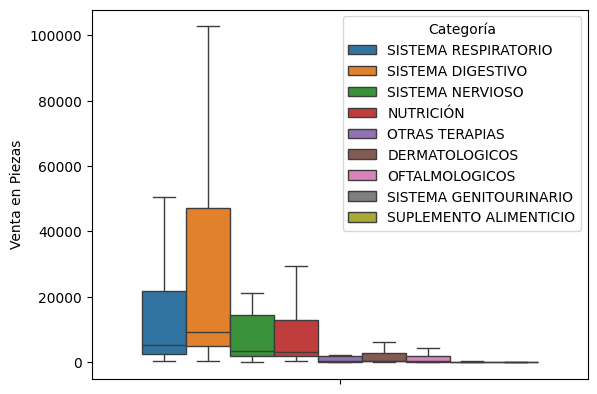

In [98]:
seaborn.boxplot(y=piezas, hue=ventas["Categoría"], showfliers=False)

In [ ]:
from scipy import stats

f_stat, p_value = stats.f_oneway(piezas_Nu, piezas_SN)

print(f"f-stat (margen): {f_stat:.2f}")
print(f"p-value (credibilidad): {p_value:.2f}")

f-stat: 2.79
p-value: 0.10


In [93]:
f_stat, p_value = stats.f_oneway(piezas_Nu, piezas_SN, piezas_SR)

print(f"f-stat (margen): {f_stat:.2f}")
print(f"p-value (credibilidad): {p_value:.2f}")

f-stat (margen): 10.65
p-value (credibilidad): 0.00


![f303](./f303.png)

<Axes: ylabel='Venta en Piezas'>

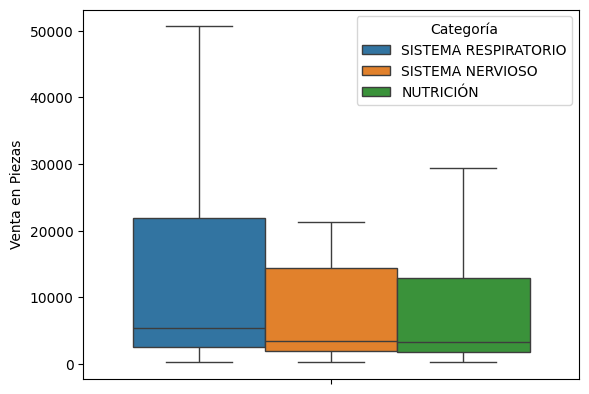

In [101]:
f1 = ventas["Categoría"] == "NUTRICIÓN"
f2 = ventas["Categoría"] == "SISTEMA NERVIOSO"
f3 = ventas["Categoría"] == "SISTEMA RESPIRATORIO"

seaborn.boxplot(y=piezas[f1 | f2 | f3], hue=ventas["Categoría"][f1 | f2 | f3], showfliers=False)

<Axes: xlabel='Venta en Piezas', ylabel='Venta en Pesos'>

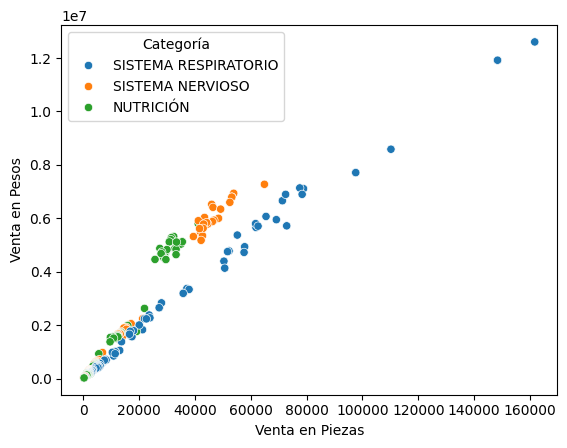

In [100]:
seaborn.scatterplot(x=piezas[f1 | f2 | f3], y=pesos[f1 | f2 | f3], hue=ventas["Categoría"][f1 | f2 | f3])